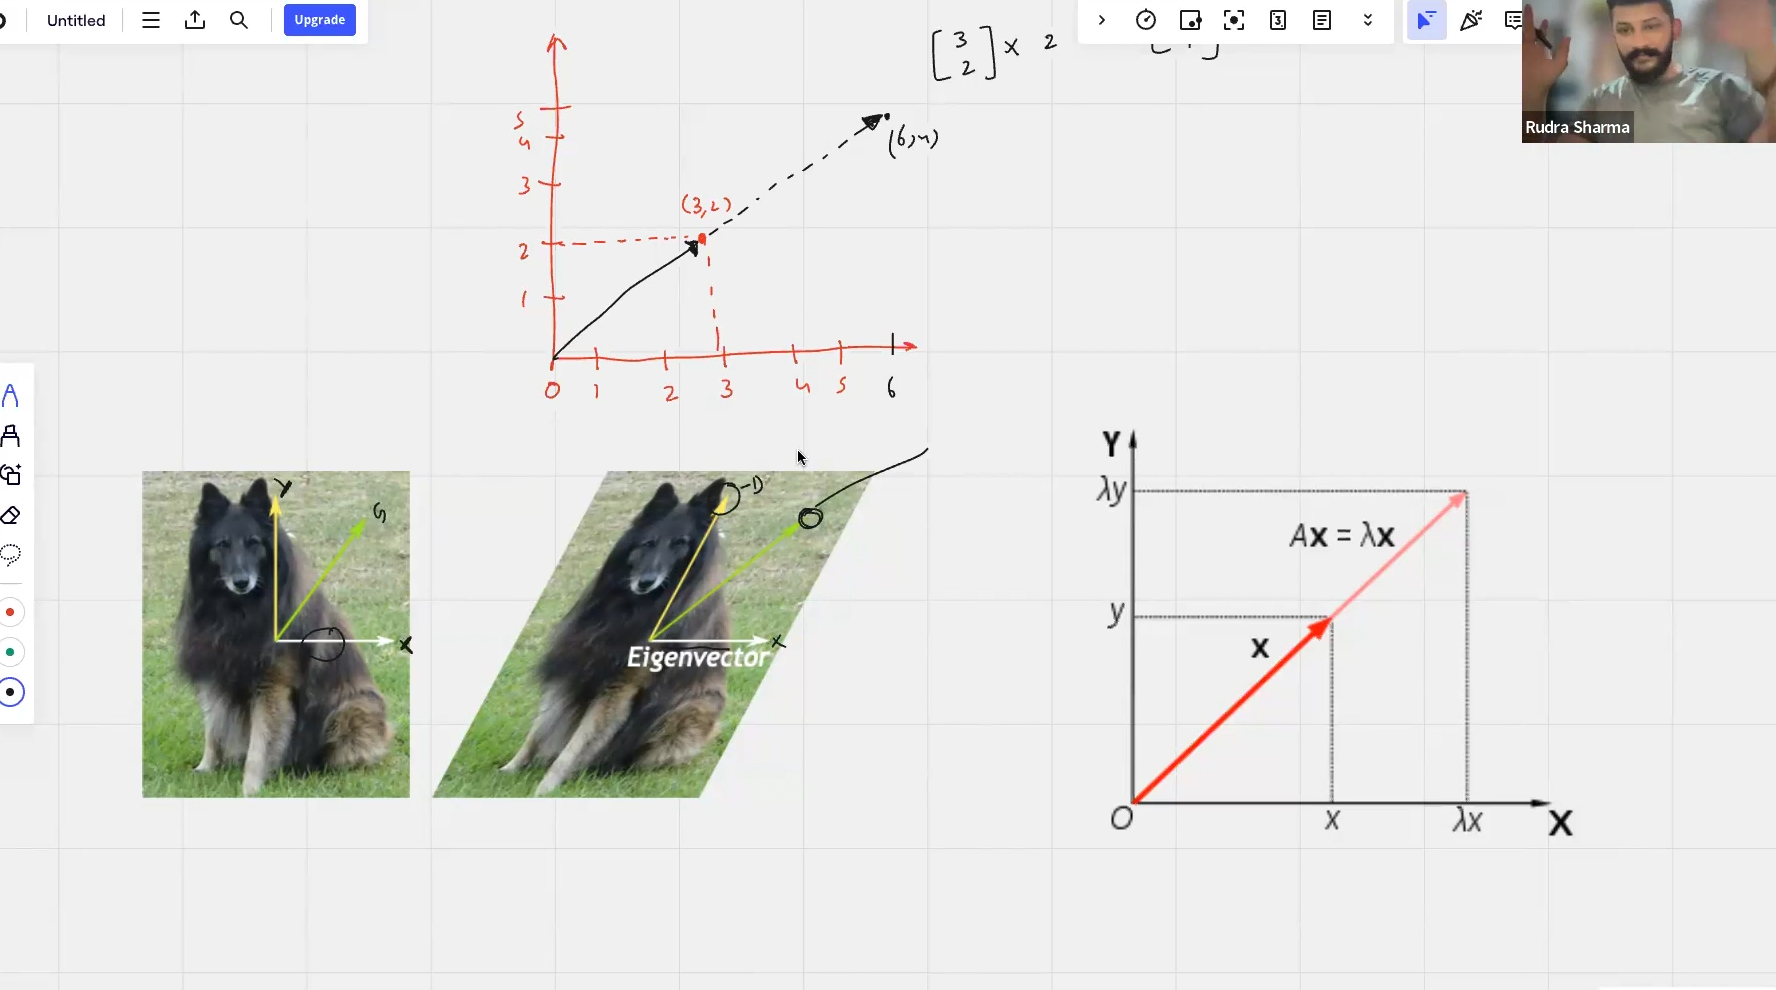

In [ ]:
#green vector direction never gets changed is always remains constant

In [ ]:
#on applying transformations its maginitude increases but the direction remains the same.This kind of vector is called eigen vector .It can go front or back but its direction remains same.

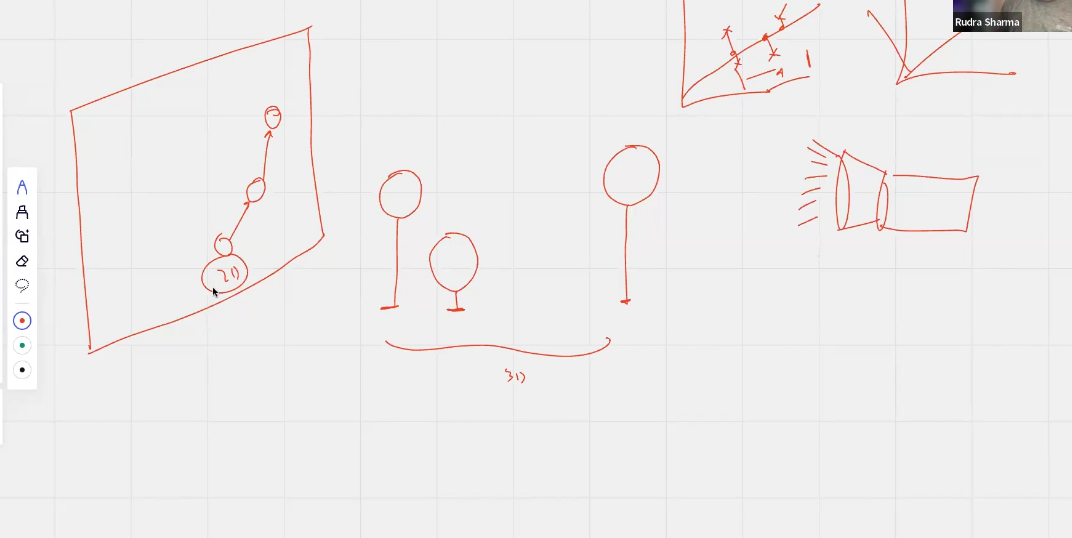

In [ ]:
# This is #3-D football data I converted it to 2-D football data

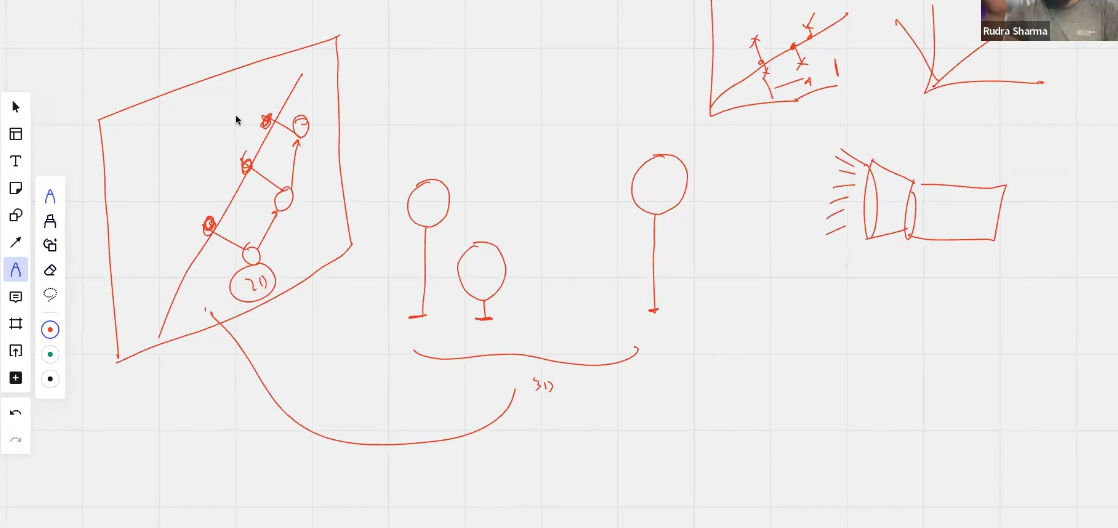

In [ ]:
#again conversion to 1-D data There is some loss of data.

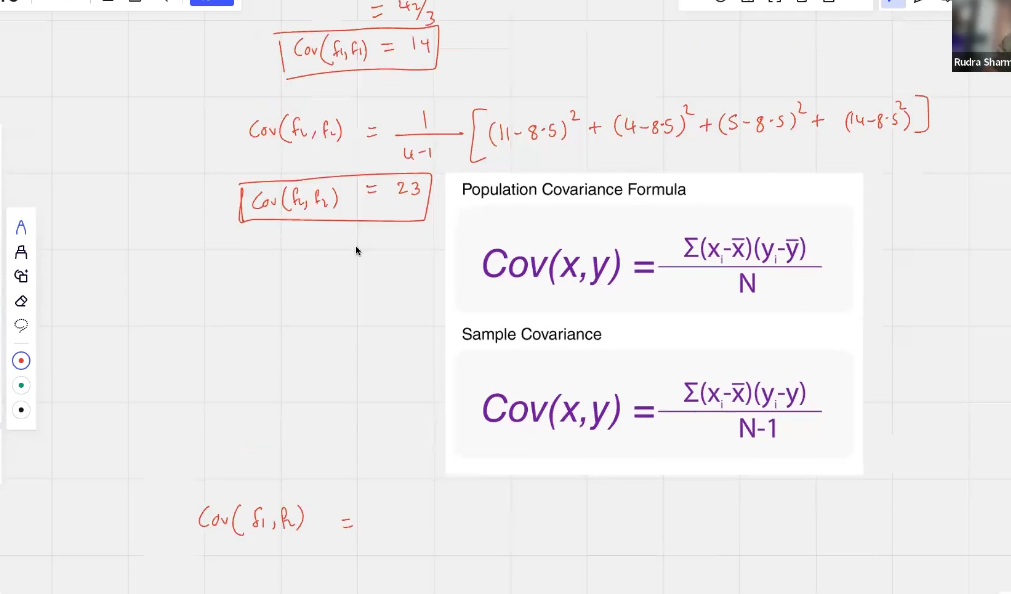

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

In [ ]:
df = pd.read_csv(url,names=['sepal length',"sepal width","petal length","petal width","target"])

In [ ]:
df.head(5)

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df.shape

(150, 5)

In [ ]:
df['target'].value_counts()  # data is balanced

,count
target,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  150 non-null    float64
 1   sepal width   150 non-null    float64
 2   petal length  150 non-null    float64
 3   petal width   150 non-null    float64
 4   target        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
features = ['sepal length',"sepal width","petal length","petal width"]
x = df.loc[:,features].values

In [ ]:
y = df.loc[:,["target"]].values

In [ ]:
scala = StandardScaler()
scala.fit_transform(x)

array([[-9.00681170e-01,  1.03205722e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00, -1.24957601e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.38535265e+00,  3.37848329e-01, -1.39813811e+00,
        -1.31297673e+00],
       [-1.50652052e+00,  1.06445364e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.02184904e+00,  1.26346019e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-5.37177559e-01,  1.95766909e+00, -1.17067529e+00,
        -1.05003079e+00],
       [-1.50652052e+00,  8.00654259e-01, -1.34127240e+00,
        -1.18150376e+00],
       [-1.02184904e+00,  8.00654259e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.74885626e+00, -3.56360566e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00,  1.06445364e-01, -1.28440670e+00,
        -1.44444970e+00],
       [-5.37177559e-01,  1.49486315e+00, -1.28440670e+00,
        -1.31297673e+00],
       [-1.26418478e+00,  8.00654259e-01, -1.22754100e+00,
      

In [ ]:
pd.DataFrame(data=x,columns=features).head(5)

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
pca = PCA(n_components=2)
principle_components = pca.fit_transform(x)

In [ ]:
principleDF = pd.DataFrame(data=principle_components,
                          columns=['PC1',"PC2"]).reset_index(drop=True)

In [ ]:
principleDF.head(4)

,PC1,PC2
0,-2.684207,0.326607
1,-2.715391,-0.169557
2,-2.889820,-0.137346
3,-2.746437,-0.311124


In [ ]:
df[['target']].tail(5)

,target
145,Iris-virginica
146,Iris-virginica
147,Iris-virginica
148,Iris-virginica
149,Iris-virginica


In [ ]:
#Machine learning is not going to die in the next 10 years.It is super critical and super important.

In [ ]:
df[['target']].head(5)

,target
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa


In [ ]:
finalDF=pd.concat([principleDF,df['target']],axis=1)

In [ ]:
finalDF['target'].value_counts()

,count
target,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


'\nax.legend(targets): Adds a legend to the plot with the target labels.\nax.grid(): Adds a grid to the plot for better readability.\n'

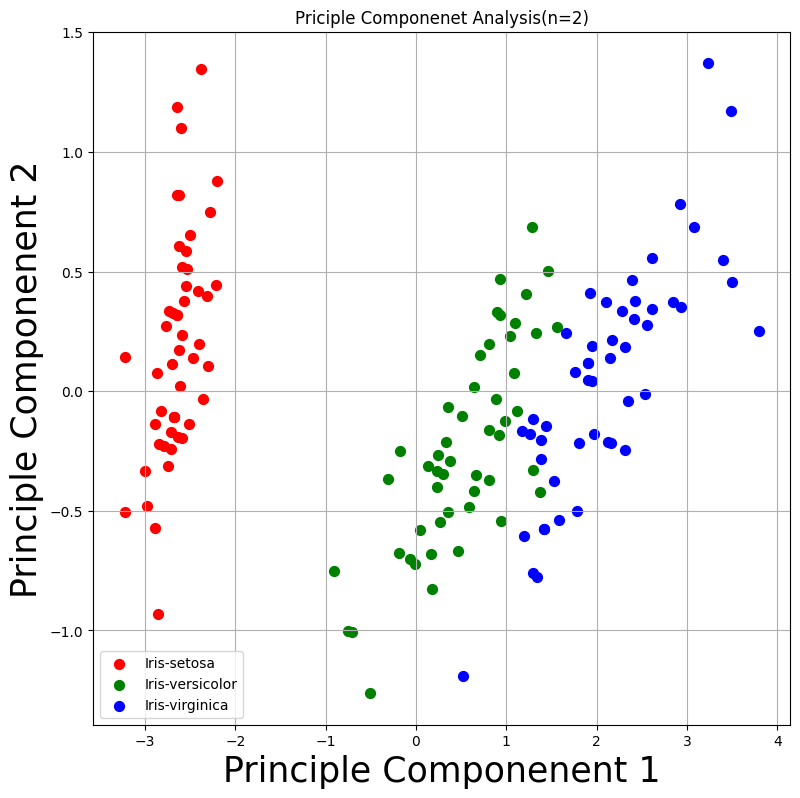

In [ ]:
fig=plt.figure(figsize=(9,9))
ax=fig.add_subplot(1,1,1)
ax.set_xlabel('Principle Componenent 1',fontsize=25)
ax.set_ylabel('Principle Componenent 2',fontsize=25)
ax.set_title("Priciple Componenet Analysis(n=2)")
targets=["Iris-setosa","Iris-versicolor","Iris-virginica"]
colors=['r','g','b']

for target,color in zip(targets,colors):
  idk=finalDF['target']==target
  ax.scatter(finalDF.loc[idk,'PC1'],finalDF.loc[idk,'PC2'],c=color,s=50)

'''
for target, color in zip(targets, colors): Loops over each target and its corresponding color.

idk = finalDF['target'] == target: Creates a boolean mask where the target column of finalDF matches the current target.

ax.scatter(finalDF.loc[idk, 'PC1'], finalDF.loc[idk, 'PC2'], c=color, s=50): Plots a scatter plot of PC1 vs. PC2 for the rows
where the target matches, using the specified color and size of 50 for the points.
'''

ax.legend(targets)
ax.grid()

'''
ax.legend(targets): Adds a legend to the plot with the target labels.
ax.grid(): Adds a grid to the plot for better readability.
'''

**Simple code of same operation without using zip** :

In this simple code:

**for i in range(len(targets))**: Loops over the indices of the targets list.

**target = targets[i] and color = colors[i]**: Retrieve the target and color for the current index.

The rest of the code remains the same for plotting the data, adding the legend, and grid.

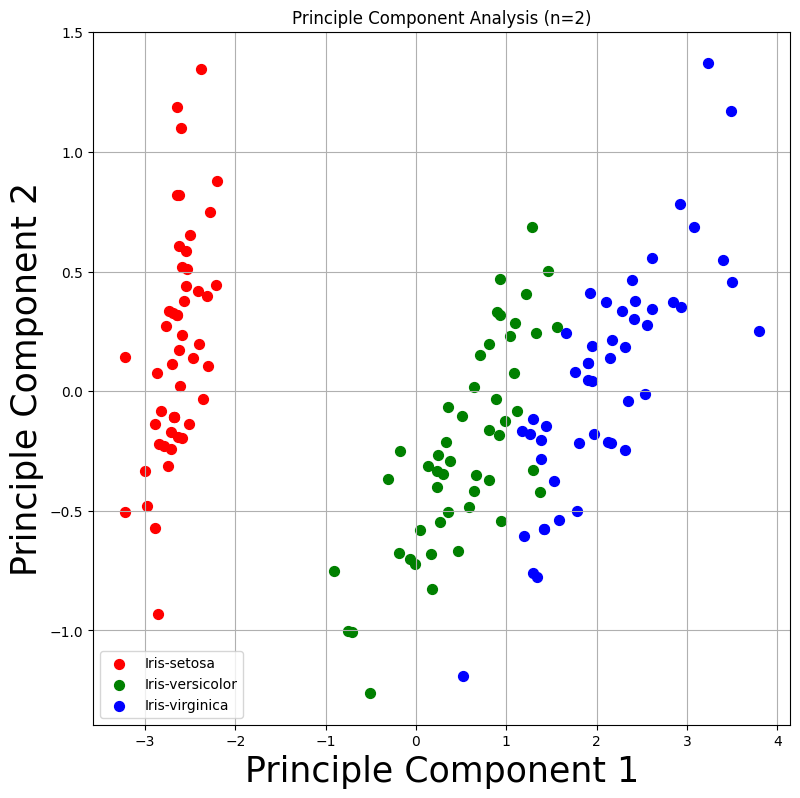

In [ ]:
fig = plt.figure(figsize=(9, 9))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('Principle Component 1', fontsize=25)
ax.set_ylabel('Principle Component 2', fontsize=25)
ax.set_title("Principle Component Analysis (n=2)")
targets = ["Iris-setosa", "Iris-versicolor", "Iris-virginica"]
colors = ['r', 'g', 'b']

for i in range(len(targets)):
    target = targets[i]
    color = colors[i]
    idk = finalDF['target'] == target
    ax.scatter(finalDF.loc[idk, 'PC1'], finalDF.loc[idk, 'PC2'], c=color, s=50)

ax.legend(targets)
ax.grid()


In [ ]:
#There is a clear separation between red ,green, and blue clusers there is some overlapping between green and blue clusters but in boundary part There is a clear separation.

In [ ]:
features = ['sepal length',"sepal width","petal length","petal width"]
x = df.loc[:,features].values

In [ ]:
y = df.loc[:,["target"]].values

In [ ]:
labelEncoder=LabelEncoder()

In [ ]:
df['target_encoded']=labelEncoder.fit_transform(df['target'])
y=df['target_encoded']

In [ ]:
y

,target_encoded
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [ ]:
pd.DataFrame(y)

,target_encoded
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [ ]:
X_train,X_test,y_train,y_test=train_test_split(principleDF,y,test_size=0.20)

In [ ]:
lr=LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [ ]:
lr_pred=lr.predict(X_test)

In [ ]:
cr=classification_report(lr_pred,y_test)
cr
print(cr)  #logistic Regression seems to be overfitting in the label 0

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.92      1.00      0.96        11
           2       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



In [ ]:
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)
dt_pred=dt.predict(X_test)

In [ ]:
cr_dt=classification_report(dt_pred,y_test)   #the size of the data matters in overfitting
print(cr_dt)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.92      0.92      0.92        12
           2       0.89      0.89      0.89         9

    accuracy                           0.93        30
   macro avg       0.94      0.94      0.94        30
weighted avg       0.93      0.93      0.93        30



In [ ]:
pca.explained_variance_ratio_

array([0.92461621, 0.05301557])

In [ ]:
#pc1 is esxplaining 92 percent of data and pc2 is expalining 0.05 percent in data.